In [344]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')
pd.set_option('display.float_format', lambda x: f'{x:,.3f}')

In [345]:
train = pd.read_csv(r'C:\Users\omer\Desktop\Kaggle\movies\train.csv')
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575,...,2/20/15,93.000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.249,...,8/6/04,113.000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.300,...,10/10/14,105.000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.175,...,3/9/12,122.000,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148,...,2/5/09,118.000,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [346]:
print(train.shape)
print(train.info())

(3000, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float6

## Remove columns I'm not likely to use. Perhaps check them again later.

In [347]:
columns_to_delete = ['id','imdb_id','overview','original_title','spoken_languages','poster_path','status','tagline','crew','title']
train = train.drop(columns_to_delete,axis=1)

## Check for missing values

In [348]:
train.isnull().sum().sort_values(ascending=False)

belongs_to_collection    2396
homepage                 2054
Keywords                  276
production_companies      156
production_countries       55
cast                       13
genres                      7
runtime                     2
revenue                     0
release_date                0
popularity                  0
original_language           0
budget                      0
dtype: int64

# Explore target variable

count           3,000.000
mean       66,725,851.889
std       137,532,326.336
min                 1.000
25%         2,379,808.250
50%        16,807,068.000
75%        68,919,203.500
max     1,519,557,910.000
Name: revenue, dtype: float64 

skew:  4.542285301660683
kurtosis:  27.78254883576798


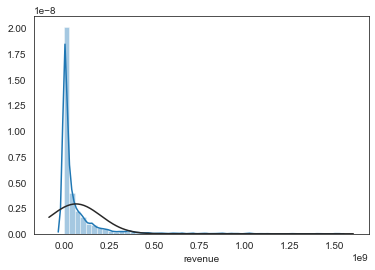

In [349]:
from scipy.stats import norm

print(train['revenue'].describe(),'\n')
print('skew: ',train['revenue'].skew())
print('kurtosis: ',train['revenue'].kurtosis())

sns.distplot(train['revenue'],fit=norm)

The target's distribution is far from normal. Trying log transformation.

count   3,000.000
mean       15.960
std         3.071
min         0.000
25%        14.683
50%        16.637
75%        18.048
max        21.142
Name: revenue, dtype: float64 

skew:  -1.6793767052948028
kurtosis:  4.3710740703449


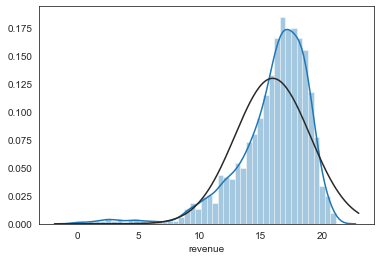

In [350]:
train['revenue'] = np.log(train['revenue'])

print(train['revenue'].describe(),'\n')
print('skew: ',train['revenue'].skew())
print('kurtosis: ',train['revenue'].kurtosis())

sns.distplot(train['revenue'],fit=norm)

Not perfect but better.

# Feature exploration and engineering

## homepage
There are lots of missing values and the adresses themselves are meaningless.
recode into "has_homepage" (yes/no).

In [351]:
train['homepage'].fillna('0',inplace=True)
train['has_homepage'] = train['homepage'].apply(lambda x: 0 if x=='0' else 1)
train = train.drop('homepage',axis=1)

has_homepage
0   15.662
1   16.606
Name: revenue, dtype: float64


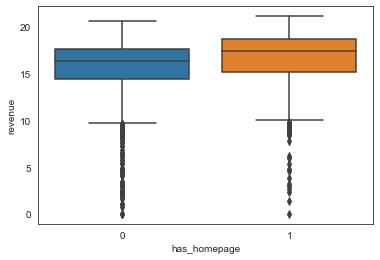

In [352]:
print(train.groupby('has_homepage')['revenue'].mean())
sns.boxplot(data=train,x='has_homepage',y='revenue')

Small difference but we'll keep it for now.

# belongs_to_collection
Again, lots of missing values. Convert to binary as well. 

In [353]:
train['belongs_to_collection'].fillna('0',inplace=True)
train['belongs_to_collection'] = train['belongs_to_collection'].apply(lambda x: 0 if x=='0' else 1)

belongs_to_collection
0   15.565
1   17.525
Name: revenue, dtype: float64


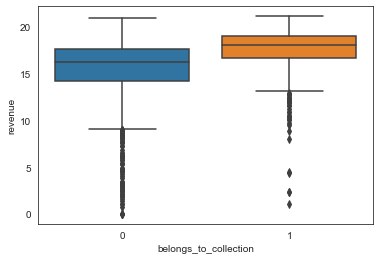

In [354]:
print(train.groupby('belongs_to_collection')['revenue'].mean())
sns.boxplot(data=train,x='belongs_to_collection',y='revenue')

# genres
The data is not in convenient format.
Need to separate to the different possible genres.
Since each movie can belong to mutiple genres, the result would be a matrix.

In [355]:
import ast
def split_to_df(str_cell):
# gets a string of a dictionary inside [], like the cells in this data.
# returns a dataframe for this dictionary 
    str_eval = ast.literal_eval(str_cell.replace('[','').replace(']',''))
    return pd.DataFrame(str_eval,index=np.arange(len(str_eval))).drop_duplicates()

split_to_df(train.loc[1,'genres'])

,id,name
0,35,Comedy
1,18,Drama
2,10751,Family
3,10749,Romance


Now apply "split_to_df" to each cell in 'genres' columns, add movie index columns, and concatenate them.
The results is a dataframe where each movie has a row for each genre it belongs to. 

But first we need to fill missing values with the correct pattern (in this case: "[{'id': 0, 'name': 'missing'}]")

In [356]:
train['genres'] = train['genres'].fillna("[{'id': 0, 'name': 'missing'}]")

for i in range(len(train)):
    x = split_to_df(train.loc[i,'genres'])
    x['movie'] = i
    if i==0:
        y = x.copy()
    else:
        y = pd.concat([y,x])
y.head(10)

,id,name,movie
0,35,Comedy,0
0,35,Comedy,1
1,18,Drama,1
2,10751,Family,1
3,10749,Romance,1
0,18,Drama,2
0,53,Thriller,3
1,18,Drama,3
0,28,Action,4
1,53,Thriller,4


Check if there are any genres that are too isoteric to keep

In [357]:
y['name'].value_counts()

Drama              1531
Comedy             1028
Thriller            789
Action              741
Romance             571
Crime               469
Adventure           439
Horror              301
Science Fiction     290
Family              260
Fantasy             232
Mystery             225
Animation           141
History             132
Music               100
War                 100
Documentary          87
Western              43
Foreign              31
missing               7
TV Movie              1
Name: name, dtype: int64

We will keep all the genres except 'Western','Foreign' and 'TV Movie' (and missing of course).

In [358]:
main_genres = ['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Crime',
       'Adventure', 'Horror', 'Science Fiction', 'Family', 'Fantasy',
       'Mystery', 'Animation', 'History', 'Music', 'War', 'Documentary']
y['name'] = y['name'].apply(lambda x: x if x in main_genres else 'Other genre')

Now we can use pivot_table to create the matrix we need: for each movie index, a binary column for each genre.

In [359]:
df = pd.DataFrame(y.pivot_table(index='movie',columns='name',values='id',aggfunc='count')).fillna(0)
df[df>1]=1
df

name,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Other genre,Romance,Science Fiction,Thriller,War
movie,,,,,,,,,,,,,,,,,,
0,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
2,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
4,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
2996,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
2997,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000


Finally, drop the original genres column and join to our data. 

In [360]:
train = train.join(df)
train = train.drop('genres',axis=1)

# original_language

In [361]:
grp = pd.DataFrame(train.groupby('original_language').agg(['mean','std','count'])['revenue'])
grp = grp[grp['count']>30]
grp.sort_values('count',ascending=False)

,mean,std,count
original_language,,,
en,16.202,2.977,2575
fr,13.718,3.394,78
ru,13.815,2.920,47
es,14.646,1.849,43
hi,15.371,3.785,42
ja,15.818,3.092,37


An overwhelming majority of the movies are in english.
For now, we will keep 'en' and 'fr'. The rest are too few to use. 'fr' might be dropped later. 

In [362]:
train['lang_en'] = train['original_language'].apply(lambda x: 1 if x=='en' else 0)
train['lang_fr'] = train['original_language'].apply(lambda x: 1 if x=='fr' else 0)
train = train.drop('original_language',axis=1)

# production_companies
Will need to do the same as in genres.

In [363]:
train['production_companies'] = train['production_companies'].fillna("[{'name': '', 'id': 0}]")

for i in range(len(train)):
    x = split_to_df(train.loc[i,'production_companies'])
    x['movie'] = i
    if i==0:
        y = x.copy()
    else:
        y = pd.concat([y,x])
y.head()

,name,id,movie
0,Paramount Pictures,4,0
1,United Artists,60,0
2,Metro-Goldwyn-Mayer (MGM),8411,0
0,Walt Disney Pictures,2,1
0,Bold Films,2266,2


In [364]:
df = pd.DataFrame(y.pivot_table(index='movie',columns='name',values='id',aggfunc='count')).fillna(0)
df[df>1]=1
print(df.sum().sort_values(ascending=False).head(20))

name
Warner Bros.                             202.000
Universal Pictures                       188.000
Paramount Pictures                       161.000
                                         156.000
Twentieth Century Fox Film Corporation   138.000
Columbia Pictures                         91.000
Metro-Goldwyn-Mayer (MGM)                 84.000
New Line Cinema                           75.000
Touchstone Pictures                       63.000
Walt Disney Pictures                      62.000
Columbia Pictures Corporation             61.000
TriStar Pictures                          53.000
Relativity Media                          48.000
Canal+                                    46.000
United Artists                            44.000
Miramax Films                             40.000
Village Roadshow Pictures                 36.000
Regency Enterprises                       31.000
BBC Films                                 30.000
Dune Entertainment                        30.000
dtype: float64


Keep only the 10 most prolific studios (at least 60 movies):

In [365]:
big_companies = ['Warner Bros.','Universal Pictures','Paramount Pictures','Twentieth Century Fox Film Corporation','Columbia Pictures','Metro-Goldwyn-Mayer (MGM)','New Line Cinema','Walt Disney Pictures','Columbia Pictures Corporation']
y['name'] = y['name'].apply(lambda x: x if x in big_companies else 'Other Company')
df = pd.DataFrame(y.pivot_table(index='movie',columns='name',values='id',aggfunc='count')).fillna(0)
df[df>1]=1

In [366]:
train = train.join(df)
train = train.drop('production_companies',axis=1)

# production_countries

In [367]:
train['production_countries'] = train['production_countries'].fillna("[{'iso_3166_1': 'Missing', 'name': ''}]")

for i in range(len(train)):
    x = split_to_df(train.loc[i,'production_countries'])
    x['movie'] = i
    if i==0:
        y = x.copy()
    else:
        y = pd.concat([y,x])

In [368]:
y['iso_3166_1'].value_counts().head(20)

US         2282
GB          380
FR          222
DE          167
CA          120
IN           81
IT           64
AU           61
JP           61
RU           58
Missing      55
ES           54
HK           42
CN           42
BE           23
IE           23
KR           22
MX           19
SE           18
NZ           17
Name: iso_3166_1, dtype: int64

In [369]:
big_countries = ['US','FR','GB','DE','IN','CA','RU','JP']
y['iso_3166_1'] = y['iso_3166_1'].apply(lambda x: x if x in big_countries else 'Other Country')

In [370]:
df = pd.DataFrame(y.pivot_table(index='movie',columns='iso_3166_1',values='name',aggfunc='count')).fillna(0)
df[df>1]=1

In [371]:
train = train.join(df)
train = train.drop('production_countries',axis=1)

# Keywords

In [372]:
train['Keywords'] = train['Keywords'].fillna("[{'id': 0, 'name': ''}]")

for i in range(len(train)):
    x = split_to_df(train.loc[i,'Keywords'])
    x['movie'] = i
    if i==0:
        y = x.copy()
    else:
        y = pd.concat([y,x])

In [373]:
print(y['name'].value_counts().head(30))

                           276
woman director             175
independent film           155
duringcreditsstinger       134
murder                     123
based on novel             111
violence                    87
sport                       82
biography                   77
aftercreditsstinger         75
revenge                     73
dystopia                    73
friendship                  72
sex                         71
suspense                    67
sequel                      66
police                      64
love                        64
teenager                    61
nudity                      57
female nudity               53
drug                        52
prison                      50
high school                 49
musical                     49
los angeles                 48
new york                    47
family                      45
father son relationship     44
investigation               41
Name: name, dtype: int64


In [374]:
main_keywords = ['woman director', 'independent film', 'duringcreditsstinger',
       'murder', 'based on novel', 'violence', 'sport', 'biography',
       'dystopia', 'aftercreditsstinger', 'revenge', 'suspense', 'friendship',
       'sex', 'sequel', 'police', 'love', 'teenager', 'nudity','female nudity']
y['name'] = y['name'].apply(lambda x: x if x in main_keywords else 'Other Keyword')

In [375]:
df = pd.DataFrame(y.pivot_table(index='movie',columns='name',values='id',aggfunc='count')).fillna(0)
df[df>1]=1

In [376]:
train = train.join(df.drop('Other Keyword',axis=1))
train = train.drop('Keywords',axis=1)

# cast
This is possibly an important feature. However, the number of actors and actresses is immense.
For now, we will just extract from it the gender of the lead actor (the first in the list). 

In [377]:
def find_gender(str1):
    gender = 0 
    ind1 = str1.find('gender')
    if ind1 >= 0:
        ind2 = str1.find(',',ind1)
        if ind2 >= 0:
            gender = str1[ind2-1]
    return int(gender)

gender_lead
1   15.859
2   16.271
Name: revenue, dtype: float64


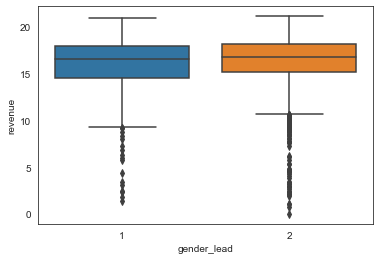

In [378]:
train['cast'] = train['cast'].fillna("[{'cast_id': 0, 'character': '', 'credit_id': '0', 'gender': 0, 'id': 0, 'name': '', 'order': 0, 'profile_path': ''}]")
train['cast'] = train['cast'].replace("[]","[{'cast_id': 0, 'character': '', 'credit_id': '0', 'gender': 0, 'id': 0, 'name': '', 'order': 0, 'profile_path': ''}]")

train['gender_lead'] = train['cast'].apply(find_gender)

train['male_lead'] = train['gender_lead'].apply(lambda x: 1 if x==2 else 0)
train['female_lead'] = train['gender_lead'].apply(lambda x: 1 if x==1 else 0)

print(train[train['gender_lead']>0].groupby('gender_lead')['revenue'].mean())
sns.boxplot(data=train[train['gender_lead']>0],x='gender_lead',y='revenue')

In [379]:
train = train.drop(['cast','gender_lead'],axis=1)

# runtime

In [380]:
train['runtime'].describe()

count   2,998.000
mean      107.857
std        22.086
min         0.000
25%        94.000
50%       104.000
75%       118.000
max       338.000
Name: runtime, dtype: float64

0 is not a valid runtime. Recode to Null

In [381]:
train.loc[train['runtime']==0,'runtime'] = np.nan

In [382]:
train['runtime'].mean()

108.29002009377093

In [383]:
train['runtime'] = train['runtime'].fillna(108)

         runtime  revenue
runtime    1.000    0.201
revenue    0.201    1.000


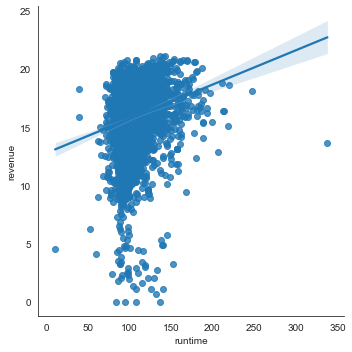

In [384]:
print(train[['runtime','revenue']].corr())
sns.lmplot(data=train,x='runtime',y='revenue')

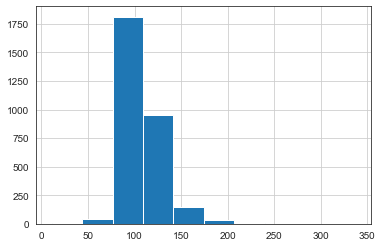

In [385]:
train['runtime'].hist()

# popularity

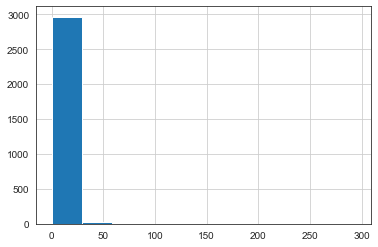

In [386]:
train['popularity'].hist()

            popularity  revenue
popularity       1.000    0.288
revenue          0.288    1.000


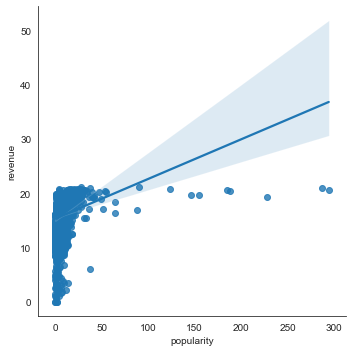

In [387]:
print(train[['popularity','revenue']].corr())
sns.lmplot(data=train,x='popularity',y='revenue')

It appears there are a few hugely popular movies reducing the correlation.

            popularity  revenue
popularity       1.000    0.488
revenue          0.488    1.000


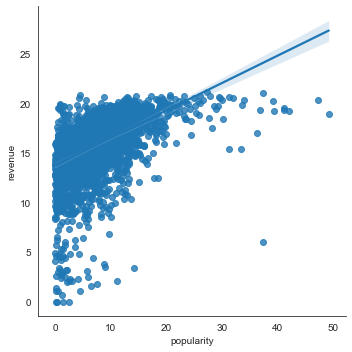

In [388]:
temp=train[train['popularity']<50]
print(temp[['popularity','revenue']].corr())
sns.lmplot(data=temp,x='popularity',y='revenue')

Removing just 15 observations (0.5%) remarkably improves things.

In [389]:
train=train[train['popularity']<50]

# release_date
We will extract month and year.

In [390]:
train.loc[:,'release_date'] = pd.to_datetime(train.loc[:,'release_date'])

In [391]:
train['release_year'] = train['release_date'].apply(lambda x: x.year)

In [392]:
train.loc[:,'release_year'] = train['release_year'].apply(lambda x: x if x<=2020 else x-100)

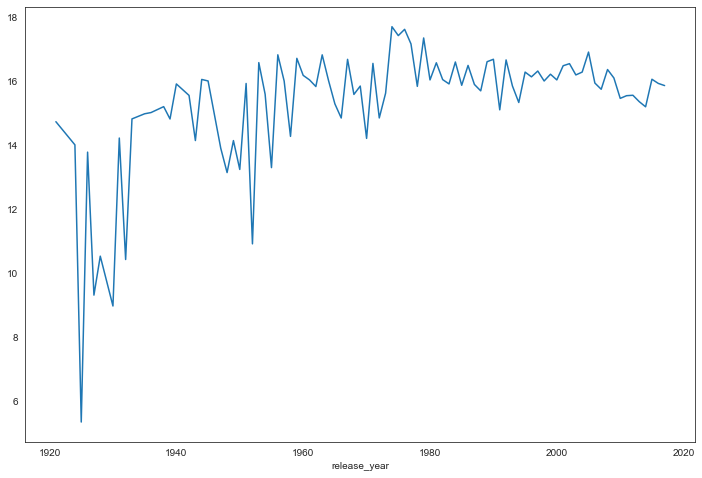

In [393]:
train.groupby('release_year').mean()['revenue'].plot(figsize=(12,8))

In [394]:
train['release_month'] = train['release_date'].apply(lambda x: x.month)

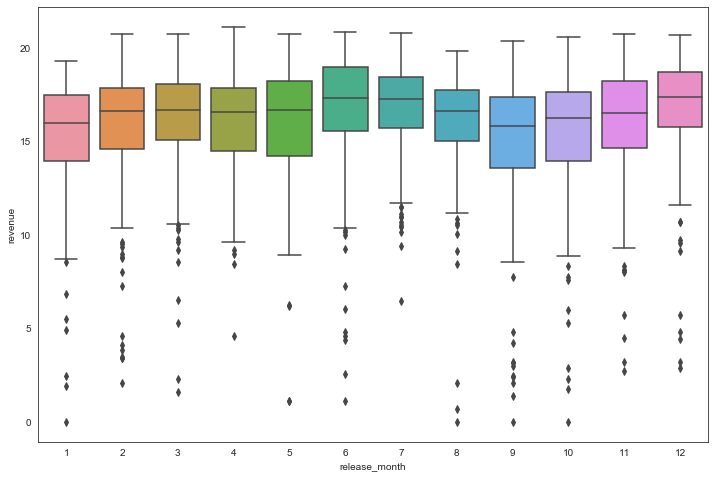

In [395]:
plt.figure(figsize=(12,8))
sns.boxplot(data=train,x='release_month',y='revenue')

In [396]:
df = pd.get_dummies(train['release_month'],prefix='release_month')
train = train.join(df)
train = train.drop(['release_date','release_month'],axis=1)

# budget

In [397]:
train['budget'].describe()

count         2,985.000
mean     22,110,118.034
std      36,291,553.588
min               0.000
25%               0.000
50%       8,000,000.000
75%      28,000,000.000
max     380,000,000.000
Name: budget, dtype: float64

Not sure what budget 0 means, but there are many of them.
It makes no difference to the correlation:

In [398]:
temp = train[['budget','revenue']]
print(temp.corr())
print(temp[data['budget'] > 0].corr())

         budget  revenue
budget    1.000    0.480
revenue   0.480    1.000
         budget  revenue
budget    1.000    0.487
revenue   0.487    1.000


## Some parameters change over time. We will create normalized versions of them, relative to the year.

In [399]:
train['budget_year'] = train['budget']/train.groupby('release_year')['budget'].transform('mean')
train['runtime_year'] = train['runtime']/train.groupby('release_year')['runtime'].transform('mean')
train['popularity_year'] = train['popularity']/train.groupby('release_year')['popularity'].transform('mean')

In [400]:
train[['revenue','budget_year','runtime_year','popularity_year']].corr()['revenue']

revenue           1.000
budget_year       0.489
runtime_year      0.192
popularity_year   0.507
Name: revenue, dtype: float64

# info and save

In [401]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2985 entries, 0 to 2999
Data columns (total 83 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   belongs_to_collection                   2985 non-null   int64  
 1   budget                                  2985 non-null   int64  
 2   popularity                              2985 non-null   float64
 3   runtime                                 2985 non-null   float64
 4   revenue                                 2985 non-null   float64
 5   has_homepage                            2985 non-null   int64  
 6   Action                                  2985 non-null   float64
 7   Adventure                               2985 non-null   float64
 8   Animation                               2985 non-null   float64
 9   Comedy                                  2985 non-null   float64
 10  Crime                                   2985 non-null   floa

In [402]:
train.to_csv(r'C:\Users\omer\Desktop\Kaggle\movies\train_fixed.csv')

# Training the Model

In [403]:
train = pd.read_csv(r'C:\Users\omer\Desktop\Kaggle\movies\train_fixed.csv',index_col=0)
train.head()

,belongs_to_collection,budget,popularity,runtime,revenue,has_homepage,Action,Adventure,Animation,Comedy,...,release_month_6,release_month_7,release_month_8,release_month_9,release_month_10,release_month_11,release_month_12,budget_year,runtime_year,popularity_year
0,1,14000000,6.575,93.000,16.326,0,0.000,0.000,0.000,1.000,...,0,0,0,0,0,0,0,0.473,0.831,0.643
1,1,40000000,8.249,113.000,18.371,0,0.000,0.000,0.000,1.000,...,0,0,1,0,0,0,0,1.238,1.075,0.984
3,0,1200000,3.175,122.000,16.588,1,0.000,0.000,0.000,0.000,...,0,0,0,0,0,0,0,0.046,1.136,0.422
4,0,0,1.148,118.000,15.183,0,1.000,0.000,0.000,0.000,...,0,0,0,0,0,0,0,0.000,1.107,0.146
5,0,8000000,0.743,83.000,14.998,0,0.000,1.000,1.000,0.000,...,0,0,1,0,0,0,0,1.219,0.808,0.106


## We'll try xgboost because it usually gives the best results.

In [404]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

X = train.drop('revenue',axis=1)
y = train['revenue']

data_dmatrix = xgb.DMatrix(data=X,label=y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [407]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error

model = XGBRegressor(objective ='reg:squarederror', n_estimators=500, learning_rate=0.01)

model.fit(X_train,y_train)
predictions = model.predict(X_test)

print('score: ', model.score(X_test,y_test))

predictions[predictions<0] = 0
print('RMSLE: ', np.sqrt(mean_squared_log_error(np.exp(y_test), np.exp(predictions))))

score:  0.47821133036902963
RMSLE:  2.292617955634429


['budget', 'budget_year', 'belongs_to_collection', 'Other genre', 'popularity_year', 'Family', 'popularity', 'Adventure', 'lang_fr', 'independent film', 'release_year', 'release_month_10', 'US', 'Crime', 'IN', 'release_month_7', 'release_month_9', 'Universal Pictures', 'CA', 'runtime', 'release_month_8', 'runtime_year', 'DE', 'release_month_2', 'Comedy', 'Animation', 'release_month_5', 'Drama', 'GB', 'police', 'love', 'suspense', 'woman director', 'lang_en', 'Thriller', 'Other Company', 'Other Country', 'release_month_6', 'FR', 'female_lead', 'male_lead', 'Documentary', 'Action', 'JP', 'release_month_1', 'teenager', 'duringcreditsstinger', 'Twentieth Century Fox Film Corporation', 'Romance', 'has_homepage', 'release_month_11', 'based on novel', 'Horror', 'Science Fiction', 'Metro-Goldwyn-Mayer (MGM)', 'release_month_4', 'New Line Cinema', 'release_month_3', 'Walt Disney Pictures', 'Warner Bros.', 'Columbia Pictures', 'Paramount Pictures', 'Fantasy', 'friendship', 'Mystery', 'RU', 'Musi

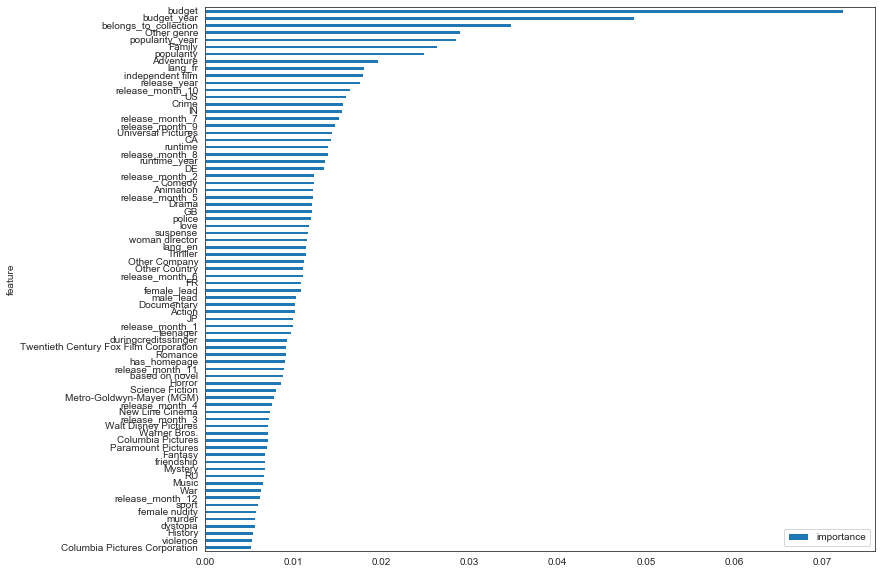

In [411]:
impdf = pd.DataFrame(list(zip(X_train.columns,model.feature_importances_)),columns=(['feature','importance']))
impdf.sort_values(by='importance',ascending=False,inplace=True)
print(impdf.loc[impdf['importance']>=0.005,'feature'].tolist())
print(impdf.loc[impdf['importance']>=0.005,:].set_index('feature').sort_values('importance').plot(kind='barh',figsize=(12,10)))

Keep only features with minimum contribution

In [412]:
X = train[['budget', 'budget_year', 'belongs_to_collection', 'Other genre', 'popularity_year', 'Family', 'popularity', 'Adventure', 'lang_fr', 'independent film', 'release_year', 'release_month_10', 'US', 'Crime', 'IN', 'release_month_7', 'release_month_9', 'Universal Pictures', 'CA', 'runtime', 'release_month_8', 'runtime_year', 'DE', 'release_month_2', 'Comedy', 'Animation', 'release_month_5', 'Drama', 'GB', 'police', 'love', 'suspense', 'woman director', 'lang_en', 'Thriller', 'Other Company', 'Other Country', 'release_month_6', 'FR', 'female_lead', 'male_lead', 'Documentary', 'Action', 'JP', 'release_month_1', 'teenager', 'duringcreditsstinger', 'Twentieth Century Fox Film Corporation', 'Romance', 'has_homepage', 'release_month_11', 'based on novel', 'Horror', 'Science Fiction', 'Metro-Goldwyn-Mayer (MGM)', 'release_month_4', 'New Line Cinema', 'release_month_3', 'Walt Disney Pictures', 'Warner Bros.', 'Columbia Pictures', 'Paramount Pictures', 'Fantasy', 'friendship', 'Mystery', 'RU', 'Music', 'War', 'release_month_12', 'sport', 'female nudity', 'murder', 'dystopia', 'History', 'violence', 'Columbia Pictures Corporation']]
y = train['revenue']

data_dmatrix = xgb.DMatrix(data=X,label=y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Hyper-parameters tuning:

In [449]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import KFold

params = {
        'min_child_weight': [1, 5, 9],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 6],
        'learning_rate': [0.01, 0.02, 0.05]
        }

model = XGBRegressor(n_estimators=500, objective='reg:squarederror',silent=True, nthread=1)

folds = 3
param_comb = 6
skf = KFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(model, param_distributions=params, n_iter=param_comb, scoring='neg_mean_squared_error', n_jobs=3, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  18 out of  18 | elapsed:   14.0s finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x00000000297843C8>,
                   error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_...
                                          verbosity=None),
                   iid='deprecated', n_iter=6, n_jobs=3,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5

In [450]:
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best estimator:
XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=1.5, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.02, max_delta_step=0, max_depth=6,
             min_child_weight=9, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=1, nthread=1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, silent=True, subsample=0.8,
             tree_method=None, validate_parameters=False, verbosity=None)

 Best hyperparameters:
{'subsample': 0.8, 'min_child_weight': 9, 'max_depth': 6, 'learning_rate': 0.02, 'gamma': 1.5, 'colsample_bytree': 0.6}


In [451]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

model = XGBRegressor(learning_rate=0.02, n_estimators=500, objective='reg:squarederror',
                    subsample= 0.8, min_child_weight=9, max_depth=6, gamma=1.5, colsample_bytree=0.6)

model.fit(X_train,y_train)
predictions = model.predict(X_test)

print('score: ', model.score(X_test,y_test))

predictions[predictions < 0] = 0
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predictions)))

score:  0.5096862800796532
RMSE:  2.233629515345341


## Cross Validation

In [452]:
from sklearn.model_selection import cross_val_score

cv_scores = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

print('Cross-validation scores:', cv_scores)
print('Mean cross-validation score: {:.3f}'.format(np.mean(cv_scores)))
print('Std cross-validation score: {:.3f}'.format(np.std(cv_scores)))

Cross-validation scores: [2.21624267 2.15513378 1.77823385 2.08791361 2.2481132 ]
Mean cross-validation score: 2.097
Std cross-validation score: 0.169
